# Project: Image Classification
## Step 1: Load and Explore the CIFAR-10 Dataset

In [2]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [3]:
# load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [4]:
# normalize pixel values (0-255) to (0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [5]:
# one-hot encode the labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [6]:
# class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

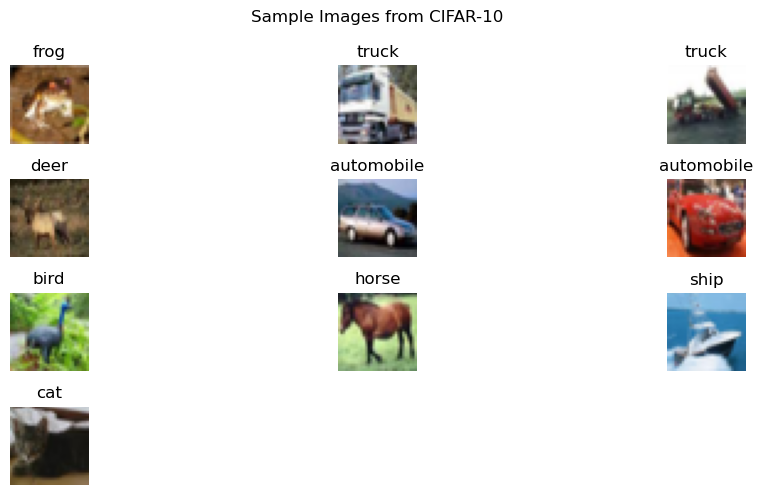

In [7]:
# display sample images
plt.figure(figsize=(10,5))
for i in range(len(class_names)):
    plt.subplot(4, 3, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(Y_train[i])])
    plt.axis('off')
plt.suptitle("Sample Images from CIFAR-10")
plt.tight_layout()
plt.show()

## Step 2: Build a CNN from Scratch (Usng Keras)

In [9]:
# import required layers and models from keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [10]:
# build the cnn model
model = Sequential()

In [11]:
# first convolutional layer
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# second convolutional layer
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [13]:
# flatten before fully connected layers
model.add(Flatten())

In [14]:
# fully connected (Dense) layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # regularization to prevent overfitting

In [15]:
# output layer
model.add(Dense(10, activation='softmax')) # 10 classes

In [16]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# we use data augmentation to increase accuracy 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(X_train)

In [18]:
# print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

## Step 3: Model Training and Evaluation

In [20]:
# train the model
history = model.fit(datagen.flow(X_train, Y_train, batch_size=64), epochs=20, validation_data=(X_test, Y_test))

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 121ms/step - accuracy: 0.3173 - loss: 1.8414 - val_accuracy: 0.5295 - val_loss: 1.3382
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.5288 - loss: 1.3149 - val_accuracy: 0.5881 - val_loss: 1.1622
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.5853 - loss: 1.1663 - val_accuracy: 0.6406 - val_loss: 1.0141
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.6121 - loss: 1.0898 - val_accuracy: 0.6815 - val_loss: 0.9109
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.6426 - loss: 1.0246 - val_accuracy: 0.6794 - val_loss: 0.9303
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.6578 - loss: 0.9629 - val_accuracy: 0.6986 - val_loss: 0.8740
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 93ms/step - accuracy: 0.6700 - loss: 0.9383 - val_accuracy: 0.7179 - val_loss: 0.8151
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.6816 - loss: 0.9035 -

In [21]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7838 - loss: 0.6291
Test Accuracy: 0.7883


In [22]:
# import library for visualize
import seaborn as sns
import matplotlib.pyplot as plt

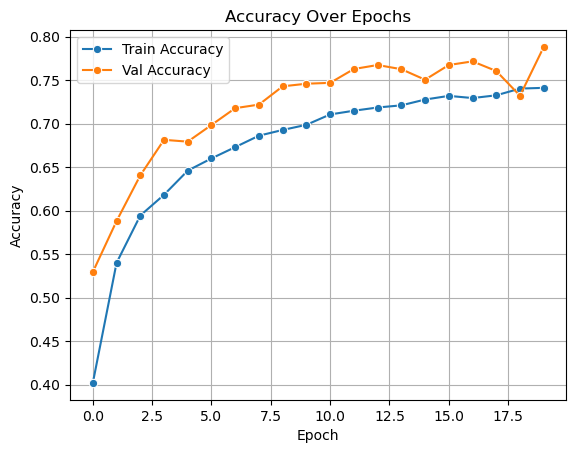

In [23]:
# accuracy
sns.lineplot(history.history['accuracy'], label='Train Accuracy', marker='o')
sns.lineplot(history.history['val_accuracy'],label='Val Accuracy', marker='o')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

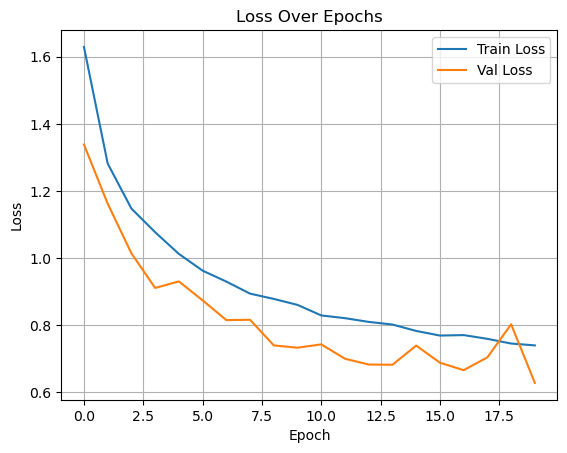

In [24]:
# loss
sns.lineplot(history.history['loss'], label='Train Loss')
sns.lineplot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [25]:
# import libraries for evaluate using metrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [26]:
# prediction on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [27]:
# report
print("Classification Report:\n\n", classification_report(y_true, y_pred_classes))

Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.87      0.93      0.90      1000
           2       0.81      0.60      0.69      1000
           3       0.71      0.55      0.62      1000
           4       0.75      0.74      0.74      1000
           5       0.76      0.66      0.71      1000
           6       0.68      0.93      0.78      1000
           7       0.79      0.86      0.83      1000
           8       0.89      0.89      0.89      1000
           9       0.82      0.90      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000



In [28]:
# matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n\n", cm)

Confusion Matrix:

 [[818  22  21   8  16   2  10  15  48  40]
 [  4 934   1   2   1   0   3   0   8  47]
 [ 68   3 605  37  70  36 126  29  12  14]
 [ 15  15  36 550  58 130 104  39  19  34]
 [ 15   4  27  22 736   8 116  64   5   3]
 [ 10   5  22 114  52 663  55  62   2  15]
 [  4   7  13  21   8   6 928   6   3   4]
 [ 13   4  11  12  39  21  22 862   1  15]
 [ 43  20   5   1   5   2   4   6 892  22]
 [ 13  65   3   4   2   1   4   3  10 895]]


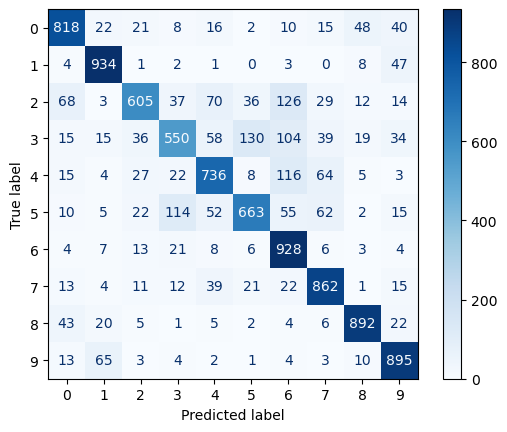

In [29]:
# display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

## Step 4: Actual vs Predicted Images

In [112]:
def predict_image(index):
    image = X_test[index]
    true_label = int(np.argmax(Y_test[index]))
    img_input = np.expand_dims(image, axis=0)
    prediction = model.predict(img_input)
    predicted_class = int(np.argmax(prediction))

    plt.figure(figsize=(2,2))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Predicted: {class_names[predicted_class]} | Actual: {class_names[true_label]}')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


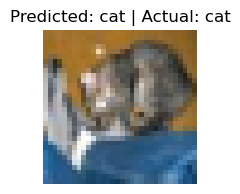

In [114]:
# call
predict_image(0)

## Step 5: Save The Model 

In [34]:
model.save("cifar10_cnn_model.keras")